In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [2]:
df = pd.read_csv('./NHIS_OPEN_GJ_2017_100.csv',engine = 'python')

In [3]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,999734.000000,999817.000000,999811.000000,999842.000000,999844.000000,999981.000000,999982.000000,999958.000000,999957.000000,999955.000000,999956.000000,997088.000000,999948.000000,995408.000000,999957.000000,999959.000000,999958.000000,999958.000000,999856.000000,999464.000000,1000000.000000,0.0,0.0,0.0,0.0,400523.000000,1000000.0
mean,2017.0,500000.500000,1.469590,10.527041,33.694584,162.22823,63.268710,81.231603,0.980478,0.978032,1.031704,1.030687,122.427552,76.048641,100.453168,195.548251,132.677959,56.938494,112.997854,14.226105,1.094422,0.862169,25.994671,25.749509,37.184273,1.607704,0.499293,0.400523,NaN,NaN,NaN,NaN,0.602130,20181126.0
std,0.0,288675.278933,0.499075,2.841183,12.672969,9.28462,12.520732,11.837625,0.608810,0.607122,0.175211,0.172468,14.558082,9.895772,24.251247,38.718205,104.163672,19.524964,35.842169,1.587416,0.438166,0.498436,23.587469,26.294770,50.624330,0.818454,0.500000,0.490005,NaN,NaN,NaN,NaN,0.590891,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,58.000000,30.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,73.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,10.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,106.000000,55.000000,111.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,159.000000,66.000000,135.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,9490.000000,8110.000000,5119.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [4]:
df = df.rename(columns={"연령대코드(5세단위)":"연령대코드", 
                        "신장(5Cm단위)":"신장", 
                        "체중(5Kg단위)":"체중",
                        "식전혈당(공복혈당)":"식전혈당"})

In [5]:
df = df[['성별코드','신장','체중','허리둘레','수축기혈압','이완기혈압','식전혈당','HDL콜레스테롤','요단백','혈청크레아티닌','흡연상태','음주여부']].copy()
df.head() 

,성별코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,HDL콜레스테롤,요단백,혈청크레아티닌,흡연상태,음주여부
0,1,170,75,90.0,120.0,80.0,99.0,48.0,1.0,1.0,1.0,1.0
1,1,180,80,89.0,130.0,82.0,106.0,55.0,1.0,0.9,3.0,0.0
2,1,165,75,91.0,120.0,70.0,98.0,41.0,1.0,0.9,1.0,0.0
3,1,175,80,91.0,145.0,87.0,95.0,76.0,1.0,1.1,1.0,0.0
4,1,165,60,80.0,138.0,82.0,101.0,61.0,1.0,0.8,1.0,0.0


In [6]:
df.isnull().sum()

성별코드           0
신장             0
체중             0
허리둘레         266
수축기혈압         19
이완기혈압         18
식전혈당          42
HDL콜레스테롤      44
요단백         4592
혈청크레아티닌       43
흡연상태         144
음주여부         536
dtype: int64

In [7]:
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당','흡연상태','음주여부'])
df

,성별코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,HDL콜레스테롤,요단백,혈청크레아티닌,흡연상태,음주여부
0,1,170,75,90.0,120.0,80.0,99.0,48.0,1.0,1.0,1.0,1.0
1,1,180,80,89.0,130.0,82.0,106.0,55.0,1.0,0.9,3.0,0.0
2,1,165,75,91.0,120.0,70.0,98.0,41.0,1.0,0.9,1.0,0.0
3,1,175,80,91.0,145.0,87.0,95.0,76.0,1.0,1.1,1.0,0.0
4,1,165,60,80.0,138.0,82.0,101.0,61.0,1.0,0.8,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,175,80,92.1,114.0,80.0,88.0,46.0,1.0,1.0,1.0,0.0
999996,1,170,75,86.0,119.0,83.0,83.0,40.0,1.0,1.1,1.0,0.0
999997,2,155,50,68.0,110.0,70.0,90.0,96.0,1.0,0.8,3.0,1.0
999998,1,175,60,72.0,119.0,74.0,69.0,38.0,1.0,0.8,1.0,0.0


In [8]:
df['음주여부'] = df['음주여부'].fillna(0)
df = df.drop(['HDL콜레스테롤'],axis=1)
df

,성별코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,요단백,혈청크레아티닌,흡연상태,음주여부
0,1,170,75,90.0,120.0,80.0,99.0,1.0,1.0,1.0,1.0
1,1,180,80,89.0,130.0,82.0,106.0,1.0,0.9,3.0,0.0
2,1,165,75,91.0,120.0,70.0,98.0,1.0,0.9,1.0,0.0
3,1,175,80,91.0,145.0,87.0,95.0,1.0,1.1,1.0,0.0
4,1,165,60,80.0,138.0,82.0,101.0,1.0,0.8,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,1,175,80,92.1,114.0,80.0,88.0,1.0,1.0,1.0,0.0
999996,1,170,75,86.0,119.0,83.0,83.0,1.0,1.1,1.0,0.0
999997,2,155,50,68.0,110.0,70.0,90.0,1.0,0.8,3.0,1.0
999998,1,175,60,72.0,119.0,74.0,69.0,1.0,0.8,1.0,0.0


In [9]:
df['수축기혈압'].value_counts().sort_index()

58.0     1
67.0     1
70.0     4
72.0     1
73.0     4
        ..
244.0    1
253.0    1
255.0    1
270.0    1
273.0    1
Name: 수축기혈압, Length: 172, dtype: int64

In [10]:
df['식전혈당'].value_counts().sort_index()

25.0     2
30.0     1
32.0     1
33.0     2
34.0     2
        ..
769.0    1
784.0    1
800.0    1
801.0    1
852.0    1
Name: 식전혈당, Length: 499, dtype: int64

In [11]:
df['허리둘레'].value_counts().sort_index()

8.0       1
27.0      1
30.0      2
32.0      3
35.0      2
         ..
138.0     1
140.0     1
145.0     1
149.1     1
999.0    57
Name: 허리둘레, Length: 739, dtype: int64

In [12]:
df = df.loc[df['허리둘레'] > 50]
df = df.loc[df['허리둘레'] < 180]
df['허리둘레'].value_counts().sort_index()

50.3      1
50.5      3
51.0     23
51.1      1
51.2      1
         ..
136.8     1
138.0     1
140.0     1
145.0     1
149.1     1
Name: 허리둘레, Length: 726, dtype: int64

In [13]:
df['식전혈당'].value_counts().sort_index() #공복에 850도 나올수 있는 정상수치인지?

25.0     2
30.0     1
32.0     1
33.0     2
34.0     2
        ..
769.0    1
784.0    1
800.0    1
801.0    1
852.0    1
Name: 식전혈당, Length: 499, dtype: int64

In [14]:
df1 = df.loc[df['식전혈당']>700]
df1['식전혈당'].value_counts().sort_index()

741.0    1
769.0    1
784.0    1
800.0    1
801.0    1
852.0    1
Name: 식전혈당, dtype: int64

In [15]:
df.isnull().sum()

성별코드          0
신장            0
체중            0
허리둘레          0
수축기혈압         0
이완기혈압         0
식전혈당          0
요단백        4557
혈청크레아티닌       3
흡연상태          0
음주여부          0
dtype: int64

## 당뇨 가능성

In [16]:
diabete = df["식전혈당"].copy()

def database(x):
    if(x > 126):
        return 1
    else :
        return 0
    
diabete = diabete.apply(database)
df["당뇨가능"] = diabete

## bmi 치수

In [17]:
weight = df[['체중','신장']].copy()

weight['BMI치수'] = weight['체중'] / ( (weight['신장'] / 100) **2 )

df['BMI치수'] = weight['BMI치수']
df['BMI치수'].value_counts().sort_index()

12.486993     3
12.755102     4
13.333333    10
13.671875    20
13.840830     4
             ..
43.252595     9
43.704475     3
44.077135     3
44.982699     4
45.714286     3
Name: BMI치수, Length: 179, dtype: int64

## BMI 코드 0 : 정상, 1 : 25~19은 경도비만,2: 30이상은 비만

In [18]:
bmi_c = df['BMI치수'].copy()

def bmi_code(x):
    if(x < 25):
        return 0
    elif (25 <= x < 30):
        return 1
    else :
        return 2
    
bmi_c = bmi_c.apply(bmi_code)
df['BMI_CODE'] = bmi_c
df['BMI_CODE'].value_counts().sort_index()

0    661622
1    290598
2     46748
Name: BMI_CODE, dtype: int64

## 복부비만

In [19]:
df_obesity = df[['성별코드','허리둘레','BMI치수']].copy() 
df_obesity["복부비만"] = 0
df_obesity.loc[(df_obesity['성별코드'] == 1)&(df_obesity['BMI치수'] >=25) & (df_obesity['허리둘레'] >= 90),'복부비만'] = 1
df_obesity.loc[(df_obesity['성별코드'] == 2)&(df_obesity['BMI치수'] >=25) & (df_obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = df_obesity["복부비만"]
df['복부비만'].value_counts().sort_index()

0    806306
1    192662
Name: 복부비만, dtype: int64

## 고혈압

In [20]:
blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 90) | (blood_pressure['수축기혈압'] >= 140),'고혈압'] = 1
df["고혈압"] = blood_pressure["고혈압"]

In [21]:
df.describe()

,성별코드,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,요단백,혈청크레아티닌,흡연상태,음주여부,당뇨가능,BMI치수,BMI_CODE,복부비만,고혈압
count,998968.000000,998968.000000,998968.000000,998968.000000,998968.000000,998968.000000,998968.000000,994411.000000,998965.000000,998968.000000,998968.00000,998968.000000,998968.000000,998968.000000,998968.000000,998968.000000
mean,1.469327,162.230512,63.271651,81.180173,122.432507,76.053497,100.458824,1.094403,0.862300,1.607974,0.49942,0.074284,23.915047,0.384491,0.192861,0.128535
std,0.499059,9.285468,12.520935,9.595046,14.556210,9.894223,24.254983,0.438220,0.498482,0.818547,0.50000,0.262232,3.516635,0.574674,0.394545,0.334684
min,1.000000,130.000000,25.000000,50.300000,58.000000,30.000000,25.000000,1.000000,0.100000,1.000000,0.00000,0.000000,12.486993,0.000000,0.000000,0.000000
25%,1.000000,155.000000,55.000000,74.100000,112.000000,70.000000,88.000000,1.000000,0.700000,1.000000,0.00000,0.000000,21.484375,0.000000,0.000000,0.000000
50%,1.000000,160.000000,60.000000,81.000000,120.000000,76.000000,96.000000,1.000000,0.800000,1.000000,0.00000,0.000000,23.875115,0.000000,0.000000,0.000000
75%,2.000000,170.000000,70.000000,87.800000,131.000000,82.000000,105.000000,1.000000,1.000000,2.000000,1.00000,0.000000,25.951557,1.000000,0.000000,0.000000
max,2.000000,190.000000,140.000000,149.100000,273.000000,185.000000,852.000000,6.000000,98.000000,3.000000,1.00000,1.000000,45.714286,2.000000,1.000000,1.000000


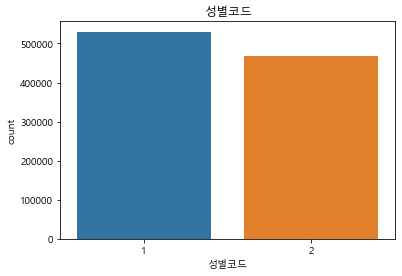

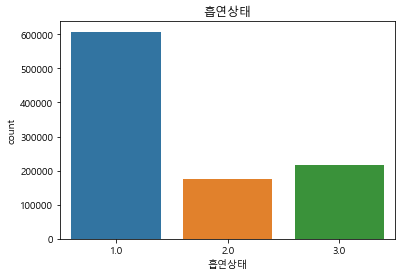

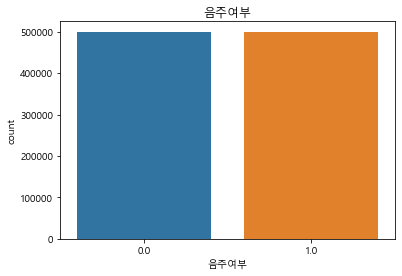

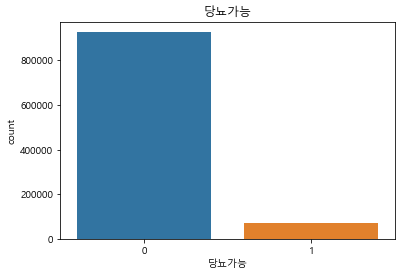

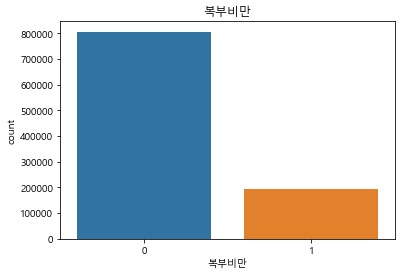

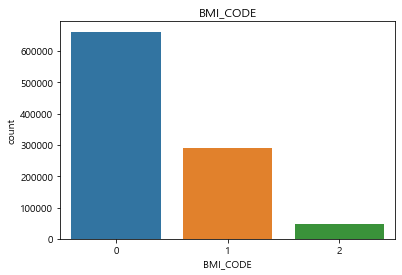

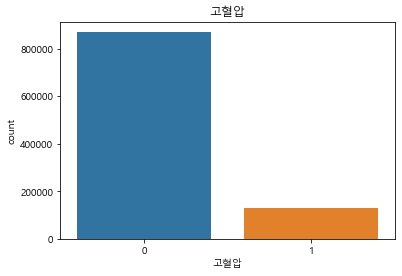

In [22]:
def show_plt(names, df):
    if(df[names].value_counts().shape[0]) > 100:
        plt.figure(figsize=(30,5))
    sns.countplot(x=names,data=df)
    plt.title(names)
    plt.show()
    
colums=['성별코드','흡연상태','음주여부','당뇨가능','복부비만','BMI_CODE','고혈압']
        
for c in colums:
    show_plt(c, df)

## 엔트로피

In [25]:
def Entropy(df, attribute) :
    list1  = list(df[attribute].unique())
    etp = 0
    for i in range(len(list1)):
        q1 = len(df[df[attribute] == list1[i]])/len(df[attribute])
        etp -=  q1*np.log2(q1)
    return etp

In [26]:
Entropy(df,"당뇨가능")

0.3817098277813134

## 그룹별

In [46]:
def Group_info(df,m_attribute,fix_attribute):
    list2 = list(df[m_attribute].unique())
    info_Entropy = Entropy(df,fix_attribute)
    info_data = 0
    for i in range (len(list2)) :
        q2 = df.loc[df[m_attribute] == list2[i]]
        info_data +=  (len(q2[m_attribute])/len(df[m_attribute]))* Entropy(q2,fix_attribute) 
    
    data = info_Entropy - info_data
    
    return data

info = np.array([("성별코드"),("흡연상태"),("음주여부"),("고혈압"),("복부비만"),("BMI_CODE")])

for i in info :
    print(i,":",Group_info(df, i,"당뇨가능"))

성별코드 : 0.0038905938155750497
흡연상태 : 0.003094709099362769
음주여부 : 2.844667628254527e-05
고혈압 : 0.005468405498954443
복부비만 : 0.007722817674689797
BMI_CODE : 0.00694579102503351
